# **Hurtlex Speech Categories**

Hurtlex is a lexicon of offensive, agressive, and hateful words in over 50 languages. The words are divided into 17 categories:

<br>

| Label | Description |
| ----- | ----------- |
| PS    | negative stereotypes ethnic slurs |
| RCI	  | locations and demonyms |
| PA	  | professions and occupations |
| DDF   |	physical disabilities and diversity |
| DDP   |	cognitive disabilities and diversity |
| DMC   |	moral and behavioral defects |
| IS    |	words related to social and economic disadvantage |
| OR    |	plants |
| AN    |	animals |
| ASM   |	male genitalia |
| ASF   |	female genitalia |
| PR    |	words related to prostitution |
| OM    |	words related to homosexuality |
| QAS   |	with potential negative connotations |
| CDS   |	derogatory words |
| RE    |	felonies and words related to crime and immoral behavior |
| SVP   | words related to the seven deadly sins of the Christian tradition |

<br>

In our experiment, the aim is to compare how influential are different linguistic categories on the data that is labeled with *hate speech*, thus we need to further group the 17 categories into 4 buckets:

- **Target Group**: *PS* (ethnic slurs/stereotypes), *RCI* (locations/demonyms), *OM* (sexual orientation), *DDF/DDP* (physical/cognitive disabilities), *PA* (professions/occupations)
- **Derogatory**: *CDS* (derogatory words), *AN* (animals), *OR* (plants), *ASM/ASF* (genitalia), *QAS* (potential negative connotations)
- **Moral Attributes**: *DMC* (moral/behavioral defects), *RE* (crime/immorality), *SVP* (sevens sins), *PR* (prostitution), *IS* (socio-economic disadvantage)


## **Download**

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

from io import StringIO

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# download the .tsv file from hurtlex and save it as a pandas.DataFrame
url = "https://raw.githubusercontent.com/valeriobasile/hurtlex/refs/heads/master/lexica/EN/1.2/hurtlex_EN.tsv"
response = requests.get(url)
hurtlex_df = pd.read_csv(StringIO(response.text), sep="\t")

print("Hurtlex Lexicon")
print("Shape:", hurtlex_df.shape)
print("Columns:", hurtlex_df.columns.tolist())
print("First 5 rows:")
print(hurtlex_df.head())

Hurtlex Lexicon
Shape: (8228, 6)
Columns: ['id', 'pos', 'category', 'stereotype', 'lemma', 'level']
First 5 rows:
       id pos category stereotype           lemma         level
0  EN1382   n      qas         no        gag reel     inclusive
1  EN7077   a      cds         no          snotty  conservative
2  EN6856   n       is        yes       mendicant  conservative
3  EN5485   n       re         no         maffias  conservative
4  EN5024   n      cds         no  lying in trade  conservative


In [5]:
hs_hurtlex_mapping = {
    "target_group": ["ps", "rci", "om", "ddf", "ddp", "pa"],
    "derogatory": ["cds", "an", "or", "asm",  "asf", "qas"],
    "moral_attributes": ["dmc", "re", "svp", "pr", "is"],
}

hate_speech_categories = {
    "target_group": None,
    "derogatory": None,
    "moral_attributes": None,
}

In [6]:
# iterate the hate speech - hurtlex mapping
for hate_speech_category, hurtlex_categories in hs_hurtlex_mapping.items():
  # extract all the lemmas of length 1 that correspond to the
  # current hurtlex categories associated with our hate speech category
  hurtlex_matches = hurtlex_df[hurtlex_df["category"].isin(hurtlex_categories)]
  hurtlex_matches = hurtlex_matches[hurtlex_matches["lemma"].str.split().str.len() == 1]

  hate_speech_categories[hate_speech_category] = hurtlex_matches["lemma"].tolist()

## **Analysis**

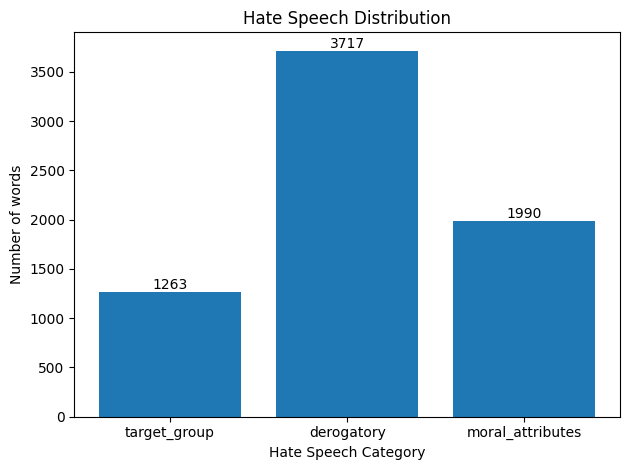

In [11]:
plt.figure()
bars = plt.bar(hate_speech_categories.keys(), [len(hs_category) for hs_category in hate_speech_categories.values()])
plt.xlabel("Hate Speech Category")
plt.ylabel("Number of words")
plt.title("Hate Speech Distribution")
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()